# ClioMakeUp Survey Data Analysis

## Dataframe preparation

### Read Excel response file and do initial cleanup

In [1]:
import pandas as pd
from IPython.display import display

In [2]:
# Read response file
response_file = '../data/risposte.xlsx'
df = pd.read_excel(response_file)

# Remove timestamps
df = df.drop(df.columns[0], axis=1)
df.head()

,Hai mai acquistato prodotti di ClioMakeUp?,Con che frequenza acquisti da ClioMakeUp? (Sia nell'e-commerce che negli store),Dove effettui gli acquisti?,Da quanto tempo conosci la linea di ClioMakeUp?,Quali prodotti di ClioMakeUp hai comprato durante il tuo ultimo acquisto?,"Quali prodotti hai comprato del brand ClioMakeUp? (Per favore includi tutti i prodotti acquistati, anche quelli del tuo ultimo acquisto)",Sei rimasto soddisfatto dopo l'utilizzo dei prodotti di ClioMakeUp?,Genere,Età (In anni compiuti),Titolo di studio conseguito,Quali delle seguenti categorie evidenziano al meglio la tua attuale condizione?,Dove vivi?,In quale provincia vivi?,Per chi acquisti i prodotti di ClioMakeUp?
0,Si,da 1 a 2 volte l'anno,"E-commerce, PopUp Store",5 anni (dal lancio dei primi rossetti),Rossetti liquidi LiquidLove,"Mascara DarkLove, Eyeliner DeepLove, Rossetti ...","Sì, ma non di tutti",Femmina,38,Laurea triennale,Lavoratore dipendente a tempo indeterminato,Italia,Alessandria,"Me, Famiglia, Amic*"
1,No,NaN,NaN,NaN,NaN,NaN,NaN,Maschio,19,Scuola secondaria di secondo grado,Studente,Italia,Alessandria,NaN
2,No,NaN,NaN,NaN,NaN,NaN,NaN,Femmina,26,Master,Lavoratore dipendente a tempo indeterminato,Italia,Alessandria,NaN
3,Si,da 1 a 2 volte l'anno,ClioMakeUp Experience Store,5 anni (dal lancio dei primi rossetti),Rossetti liquidi LiquidLove,"Fondotinta OhMyLove, Correttore OhMyLove, Pale...",Sì,Femmina,38,Scuola secondaria di secondo grado,Disoccupata\o,Italia,Alessandria,Me
4,Si,da 5 a 6 volte l'anno,E-commerce,5 anni (dal lancio dei primi rossetti),"Correttore OhMyLove, Ombretti cremosi SweetieL...","Correttore OhMyLove, Blush CuteLove, Illuminan...",Assolutamente si,Femmina,25,Laurea magistrale,Lavoratore dipendente a tempo indeterminato,Italia,Ancona,Me


In [3]:
# Rename headers
headers = ['Customer',
           'Frequency',
           'PurchaseLocation',
           'BrandKnownFor',
           'LastPurchase',
           'AllPurchases',
           'Satisfaction',
           'Gender',
           'Age',
           'Education',
           'Profession',
           'PlaceOfResidence',
           'Province',
           'SelfOrOthers'
]
df.columns = headers
df.head()

,Customer,Frequency,PurchaseLocation,BrandKnownFor,LastPurchase,AllPurchases,Satisfaction,Gender,Age,Education,Profession,PlaceOfResidence,Province,SelfOrOthers
0,Si,da 1 a 2 volte l'anno,"E-commerce, PopUp Store",5 anni (dal lancio dei primi rossetti),Rossetti liquidi LiquidLove,"Mascara DarkLove, Eyeliner DeepLove, Rossetti ...","Sì, ma non di tutti",Femmina,38,Laurea triennale,Lavoratore dipendente a tempo indeterminato,Italia,Alessandria,"Me, Famiglia, Amic*"
1,No,NaN,NaN,NaN,NaN,NaN,NaN,Maschio,19,Scuola secondaria di secondo grado,Studente,Italia,Alessandria,NaN
2,No,NaN,NaN,NaN,NaN,NaN,NaN,Femmina,26,Master,Lavoratore dipendente a tempo indeterminato,Italia,Alessandria,NaN
3,Si,da 1 a 2 volte l'anno,ClioMakeUp Experience Store,5 anni (dal lancio dei primi rossetti),Rossetti liquidi LiquidLove,"Fondotinta OhMyLove, Correttore OhMyLove, Pale...",Sì,Femmina,38,Scuola secondaria di secondo grado,Disoccupata\o,Italia,Alessandria,Me
4,Si,da 5 a 6 volte l'anno,E-commerce,5 anni (dal lancio dei primi rossetti),"Correttore OhMyLove, Ombretti cremosi SweetieL...","Correttore OhMyLove, Blush CuteLove, Illuminan...",Assolutamente si,Femmina,25,Laurea magistrale,Lavoratore dipendente a tempo indeterminato,Italia,Ancona,Me


### Clean up column by column

In [4]:
# Function to:
# - set 'category' data type for the column
# - define the complete list of categories (even those that never appear in the data) and their order
# - rename the categories from Italian to English
def fill_rename_categories(s, categories):
    # Set categorical dtype
    s = s.astype('category')

    # Set categories, define unused and define order
    s = s.cat.set_categories(list(categories.keys()), ordered=True)

    # Translate to English
    s = s.cat.rename_categories(categories)

    return s

# Function to check all the answers reported in the data for a column (a question) againsts a list of valid answers
def check_spurious_values(s, value_list, multiple=False):
    # If an entry can contain multiple values, split them
    if multiple:
        s = s.str.split(',').map(lambda item: [i.strip() for i in item], na_action='ignore')
        s = s.explode(column)
    
    # Compare values in the column with valid values
    vc = s.value_counts()
    column_values = vc.index
    valid = ['Ok' if value in value_list else 'Invalid' for value in column_values]

    display(pd.DataFrame({'Occurrences': vc, 'Valid': valid}))
    

#### Customer

In [5]:
column = 'Customer'
categories = {
    'Si': 'Yes',
    'No': 'No',
}
df[column] = fill_rename_categories(df[column], categories)

#### Frequency

In [6]:
column = 'Frequency'
categories = {
    "da 1 a 2 volte l'anno": "1-2 times a year",
    "da 3 a 4 volte l'anno": "3-4 times a year",
    "da 5 a 6 volte l'anno": "5-6 times a year",
    "da 7 a 8 volte l'anno": "7-8 times a year",
    "più di 9 volte l'anno": "> 9 times a year",
}
df[column] = fill_rename_categories(df[column], categories)

#### PurchaseLocation
The question contains the 'Other' option, so we need to check and correct spurious values.

In [7]:
column = 'PurchaseLocation'
categories = ['E-commerce', 'PopUp Store', 'ClioMakeUp Experience Store']

# Check valid answers
check_spurious_values(df[column], categories, multiple=True)

,Occurrences,Valid
E-commerce,104,Ok
PopUp Store,48,Ok
ClioMakeUp Experience Store,12,Ok
On-line,1,Invalid


In [8]:
# Clean data (change spurious 'On-line' to 'E-commerce')
df[column] = df[column].str.replace('On-line', 'E-commerce')
check_spurious_values(df[column], categories, multiple=True)

,Occurrences,Valid
E-commerce,105,Ok
PopUp Store,48,Ok
ClioMakeUp Experience Store,12,Ok


In [9]:
# Turn single strings into list of strings
df[column] = df[column].str.split(',').map(lambda item: [i.strip() for i in item], na_action='ignore')

#### BrandKnownFor

In [10]:
column = 'BrandKnownFor'
categories = {
    'Meno di un anno':                          'less than 1 year',
    '1 anno':                                   '1 year',
    '2 anni':                                   '2 years',
    '3 anni':                                   '3 years',
    '4 anni':                                   '4 years',
    '5 anni (dal lancio dei primi rossetti)':   '5 years (first lipstick launch)',
}

# Check valid answers
check_spurious_values(df[column], categories)

,Occurrences,Valid
5 anni (dal lancio dei primi rossetti),96,Ok
2 anni,12,Ok
4 anni,9,Ok
3 anni,8,Ok
1 anno,4,Ok
Meno di un anno,3,Ok
Da molto più di 5 anni,1,Invalid


In [11]:
# Clean data
df[column] = df[column].str.replace('Da molto più di 5 anni', '5 anni (dal lancio dei primi rossetti)')
check_spurious_values(df[column], categories)

,Occurrences,Valid
5 anni (dal lancio dei primi rossetti),97,Ok
2 anni,12,Ok
4 anni,9,Ok
3 anni,8,Ok
1 anno,4,Ok
Meno di un anno,3,Ok


In [12]:
# Set categories
df[column] = fill_rename_categories(df[column], categories)

#### LastPurchase
This data is used to derive the average receipt amount for each customer

In [13]:
column = 'LastPurchase'
# Define price dictionary
prices_dict = {
    'WonderMousse (Mousse viso detergente e struccante)':   15.50,
    'SuperStrucco (Balsamo detergente e struccante)':       24.50,
    'Kit doppia detersione (WonderMousse + SuperStrucco)':  35.00,
    'Paciocchi (Maschera occhi)':                           6.50,
    'Kit Paciocchi 5+1':                                    32.50,
    'Fondotinta OhMyLove':                                  28.50,
    'Correttore OhMyLove':                                  17.50,
    'Blush CuteLove':                                       15.50,
    'Illuminante CosmicLove':                               16.50,
    'Matite Sopracciglia AllDayLov Brow':                   12.50,
    'Ombretti liquidi SweetieLove':                         14.50,
    'Ombretti cremosi SweetieLove':                         14.50,
    'Mascara DarkLove':                                     14.50,
    'Eyeliner DeepLove':                                    14.50,
    'Matita occhi AllDayLove':                              10.50,
    'Palette BeautyLove':                                   57.50,
    'Palette FirstLove':                                    32.50,
    'Palette MyFirstLove ( 4 ombretti)':                    5.50,
    'Ombretti ClioMakeUp Eyeshadow':                        6.50,
    'Ultrabalm Passion (Limited Edition)':                  15.50,
    'Ultrabalm CoccoLove':                                  15.50,
    'Lip balm colorati CoccoLove':                          12.50,
    'Rossetti liquidi LiquidLove':                          13.50,
    'Rossetti cremosi CreamyLove':                          12.50,
    'Pennelli':                                             22.00,
}
# Create new column with receipt amount
new_column = 'ReceiptAmount'
df[new_column] = df[column].map(lambda item: sum([prices_dict[i.strip()] for i in item.split(',') if i.strip() in prices_dict]), na_action='ignore')

In [14]:
# Create receipt groups
df['ReceiptAmountGroup'] = pd.cut(df['ReceiptAmount'], [0, 20, 40, 60, 80, 1000])
df['ReceiptAmountGroup'].value_counts().sort_index()

(0, 20]       56
(20, 40]      35
(40, 60]      26
(60, 80]       9
(80, 1000]     7
Name: ReceiptAmountGroup, dtype: int64

#### AllPurchases

In [15]:
column = 'AllPurchases'
categories = list(prices_dict.keys())

# Check valid answers
check_spurious_values(df[column], categories, multiple=True)

,Occurrences,Valid
Rossetti liquidi LiquidLove,76,Ok
Rossetti cremosi CreamyLove,67,Ok
Mascara DarkLove,62,Ok
Correttore OhMyLove,48,Ok
Ombretti cremosi SweetieLove,42,Ok
Fondotinta OhMyLove,31,Ok
Lip balm colorati CoccoLove,31,Ok
Eyeliner DeepLove,29,Ok
Matita occhi AllDayLove,29,Ok
Blush CuteLove,22,Ok


In [16]:
# Clean data
df[column] = df[column].str.replace('passion', 'Passion')
check_spurious_values(df[column], categories, multiple=True)
# Turn single strings into list of strings
df[column] = df[column].str.split(',').map(lambda item: [i.strip() for i in item], na_action='ignore')

,Occurrences,Valid
Rossetti liquidi LiquidLove,76,Ok
Rossetti cremosi CreamyLove,67,Ok
Mascara DarkLove,62,Ok
Correttore OhMyLove,48,Ok
Ombretti cremosi SweetieLove,42,Ok
Fondotinta OhMyLove,31,Ok
Lip balm colorati CoccoLove,31,Ok
Eyeliner DeepLove,29,Ok
Matita occhi AllDayLove,29,Ok
Blush CuteLove,22,Ok


#### Satisfaction

In [17]:
column = 'Satisfaction'
categories = {
    "Assolutamente si":     "Definitely yes",
    "Sì":                   "Yes",
    "Sì, ma non di tutti":  "Yes, but not all",
    "No":                   "No",
    "Assolutamente no":     "Definitely no",
}

# Check valid answers
check_spurious_values(df[column], categories)

,Occurrences,Valid
Assolutamente si,56,Ok
Sì,44,Ok
"Sì, ma non di tutti",28,Ok
No,3,Ok
Assolutamente no,2,Ok


No invalid answers, so we just set the categories. Nothing to correct.

In [18]:
# Set categories
df[column] = fill_rename_categories(df[column], categories)

#### Gender

In [19]:
column = 'Gender'
categories = {
    "Maschio":  "Male",
    "Femmina":  "Female",
    "Altro":    "Other",
}
# Set categories
df[column] = fill_rename_categories(df[column], categories)

#### Age

In [20]:
column = 'Age'
# Just set the data type as integer
df[column] = df[column].astype('int')

#### Education

In [21]:
column = 'Education'
categories = {
    "Licenza media":                        "Middle school",
    "Scuola secondaria di secondo grado":   "High school",
    "Laurea triennale":                     "Bachelor's degree",
    "Laurea magistrale":                    "Master's degree",
    "Master":                               "Postgraduate specialisation",
    "Dottorato di ricerca":                 "PhD",
}

# Check valid answers
check_spurious_values(df[column], categories)

,Occurrences,Valid
Scuola secondaria di secondo grado,114,Ok
Laurea triennale,107,Ok
Laurea magistrale,71,Ok
Master,20,Ok
Licenza media,11,Ok
Dottorato di ricerca,4,Ok
Acconciatura,1,Invalid
"Estetista, onicotenica",1,Invalid


We make some assumptions on the education for the two invalid answers so we can still use those entries.

In [22]:
# Clean data
df[column] = df[column].str.replace('Acconciatura', 'Licenza media')
index = df[df[column].str.contains('Estetista, onicotenica')].index[0]
df.at[index, column] = 'Scuola secondaria di secondo grado'
check_spurious_values(df[column], categories)

,Occurrences,Valid
Scuola secondaria di secondo grado,115,Ok
Laurea triennale,107,Ok
Laurea magistrale,71,Ok
Master,20,Ok
Licenza media,12,Ok
Dottorato di ricerca,4,Ok


In [23]:
# Set categories
df[column] = fill_rename_categories(df[column], categories)

#### Profession

In [24]:
column = 'Profession'
categories = {
    "Studente":                                     "Student",
    "Stagista":                                     "Intern",
    "Lavoratore autonomo":                          "Self-employed",
    "Lavoratore dipendente a tempo determinato":    "Employed (fixed-term contract)",
    "Lavoratore dipendente a tempo indeterminato":  "Employed (permanent contract)",
    "Disoccupata\o":                                "Unemployed",
    "Altro":                                        "Other",
}
df[column] = fill_rename_categories(df[column], categories)

#### SelfOrOthers

In [25]:
column = 'SelfOrOthers'
categories = {
    "Me":       "Me",
    "Famiglia": "Family",
    "Amic*":    "Friends",
    "Partner":  "Partner",
}

# Check valid answers
check_spurious_values(df[column], categories, multiple=True)

,Occurrences,Valid
Me,129,Ok
Famiglia,29,Ok
Amic*,17,Ok
Per il mio kit professionale,1,Invalid
Partner,1,Ok


In [26]:
# Clean data
df[column] = df[column].str.replace('Per il mio kit professionale', 'Me')
check_spurious_values(df[column], categories, multiple=True)

,Occurrences,Valid
Me,130,Ok
Famiglia,29,Ok
Amic*,17,Ok
Partner,1,Ok


In [27]:
# Translate data
# We can't use the fill_rename_categories() method because each entry is a single string of multiple answers
for key, value in categories.items():
    df[column] = df[column].str.replace(key, value, regex=False)

In [28]:
# Turn single strings into list of strings
df[column] = df[column].str.split(',').map(lambda item: [i.strip() for i in item], na_action='ignore')

Show the final resulting dataframe

In [29]:
df.head()

,Customer,Frequency,PurchaseLocation,BrandKnownFor,LastPurchase,AllPurchases,Satisfaction,Gender,Age,Education,Profession,PlaceOfResidence,Province,SelfOrOthers,ReceiptAmount,ReceiptAmountGroup
0,Yes,1-2 times a year,"[E-commerce, PopUp Store]",5 years (first lipstick launch),Rossetti liquidi LiquidLove,"[Mascara DarkLove, Eyeliner DeepLove, Rossetti...","Yes, but not all",Female,38,Bachelor's degree,Employed (permanent contract),Italia,Alessandria,"[Me, Family, Friends]",13.5,"(0.0, 20.0]"
1,No,NaN,NaN,NaN,NaN,NaN,NaN,Male,19,High school,Student,Italia,Alessandria,NaN,NaN,NaN
2,No,NaN,NaN,NaN,NaN,NaN,NaN,Female,26,Postgraduate specialisation,Employed (permanent contract),Italia,Alessandria,NaN,NaN,NaN
3,Yes,1-2 times a year,[ClioMakeUp Experience Store],5 years (first lipstick launch),Rossetti liquidi LiquidLove,"[Fondotinta OhMyLove, Correttore OhMyLove, Pal...",Yes,Female,38,High school,Unemployed,Italia,Alessandria,[Me],13.5,"(0.0, 20.0]"
4,Yes,5-6 times a year,[E-commerce],5 years (first lipstick launch),"Correttore OhMyLove, Ombretti cremosi SweetieL...","[Correttore OhMyLove, Blush CuteLove, Illumina...",Definitely yes,Female,25,Master's degree,Employed (permanent contract),Italia,Ancona,[Me],45.5,"(40.0, 60.0]"


## Demographic analysis

In [30]:
# Imports matplotlib and helper stuff for plots
import plot_config as pcfg

### Gender

In [31]:
df['Gender'].value_counts().plot.pie(**pcfg.pie_kwargs)
pcfg.save_fig('dem01_gender')

### Age

In [32]:
# See info about age
df['Age'].describe()

count    329.000000
mean      28.085106
std        8.193472
min       18.000000
25%       23.000000
50%       26.000000
75%       31.000000
max       66.000000
Name: Age, dtype: float64

In [33]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], [0, 25, 35, 45, 1000], labels=['<25', '25-35', '35-45', '>45'])
df['AgeGroup'].value_counts().sort_index()

<25      155
25-35    127
35-45     30
>45       17
Name: AgeGroup, dtype: int64

In [34]:
ax = df['AgeGroup'].value_counts().sort_index().plot.bar(**pcfg.bar_kwargs, color=pcfg.random_color())
pcfg.hide_spines(ax)
pcfg.save_fig('dem02_age')

### Education

In [35]:
df['Education'].value_counts().sort_index()

Middle school                   12
High school                    115
Bachelor's degree              107
Master's degree                 71
Postgraduate specialisation     20
PhD                              4
Name: Education, dtype: int64

In [36]:
x = df['Education'].value_counts(normalize=True).sort_index(ascending=False) * 100
ax = x.plot.barh(**pcfg.bar_kwargs, color=pcfg.random_color())
ax.set_xlabel('%')
pcfg.hide_spines(ax)
pcfg.save_fig('dem03_education')

### Profession

In [37]:
df['Profession'].value_counts().sort_index()

Student                           138
Intern                             14
Self-employed                      25
Employed (fixed-term contract)     41
Employed (permanent contract)      70
Unemployed                         20
Other                              21
Name: Profession, dtype: int64

In [38]:
x = df['Profession'].value_counts(normalize=True).sort_index(ascending=False) * 100
ax = x.plot.barh(**pcfg.bar_kwargs, color=pcfg.random_color())
ax.set_xlabel('%')
pcfg.hide_spines(ax)
pcfg.save_fig('dem04_profession')

## Response analysis

In [39]:
from matplotlib_venn import venn3
import helpers as h

In [40]:
x = ['Customer', 'Frequency', 'BrandKnownFor', 'Satisfaction', 'ReceiptAmountGroup']
y = ['Customer', 'Frequency', 'BrandKnownFor', 'Satisfaction', 'Gender', 'Education', 'Profession', 'ReceiptAmountGroup', 'AgeGroup']

for i in x:
    for j in y:
        print(f'{i} x {j}')
        ct = pd.crosstab(df[i], df[j], dropna=False)
        display(ct)
        h.chi2test(ct)
        print()

Customer x Customer


Customer,Yes,No
Customer,,
Yes,133,0
No,0,196


Chi2 score =  328.99999999999994
p-value = 0.0 < 0.05
Null hypothesis is rejected => Significant association between these two variables

Customer x Frequency


Frequency,1-2 times a year,3-4 times a year,5-6 times a year,7-8 times a year,> 9 times a year
Customer,,,,,
Yes,101,23,8,1,0
No,0,0,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Customer x BrandKnownFor


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


BrandKnownFor,less than 1 year,1 year,2 years,3 years,4 years,5 years (first lipstick launch)
Customer,,,,,,
Yes,3,4,12,8,9,97
No,0,0,0,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Customer x Satisfaction


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Satisfaction,Definitely yes,Yes,"Yes, but not all",No,Definitely no
Customer,,,,,
Yes,56,44,28,3,2
No,0,0,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Customer x Gender


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Gender,Male,Female,Other
Customer,,,
Yes,0,132,1
No,34,160,2


Chi2 score =  25.904298417276063
p-value = 2.371117467592221e-06 < 0.05
Null hypothesis is rejected => Significant association between these two variables

Customer x Education


Education,Middle school,High school,Bachelor's degree,Master's degree,Postgraduate specialisation,PhD
Customer,,,,,,
Yes,5,41,42,31,11,3
No,7,74,65,40,9,1


Chi2 score =  5.215066024546803
p-value = 0.3902011830540708 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Customer x Profession


Profession,Student,Intern,Self-employed,Employed (fixed-term contract),Employed (permanent contract),Unemployed,Other
Customer,,,,,,,
Yes,41,4,13,17,40,9,9
No,97,10,12,24,30,11,12


Chi2 score =  17.153488399266614
p-value = 0.008735399713925451 < 0.05
Null hypothesis is rejected => Significant association between these two variables

Customer x ReceiptAmountGroup


ReceiptAmountGroup,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 1000]"
Customer,,,,,
Yes,56,35,26,9,7
No,0,0,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Customer x AgeGroup


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


AgeGroup,<25,25-35,35-45,>45
Customer,,,,
Yes,50,58,15,10
No,105,69,15,7


Chi2 score =  9.274547657786162
p-value = 0.025854796312009376 < 0.05
Null hypothesis is rejected => Significant association between these two variables

Frequency x Customer


Customer,Yes,No
Frequency,,
1-2 times a year,101,0
3-4 times a year,23,0
5-6 times a year,8,0
7-8 times a year,1,0
> 9 times a year,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Frequency x Frequency


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Frequency,1-2 times a year,3-4 times a year,5-6 times a year,7-8 times a year,> 9 times a year
Frequency,,,,,
1-2 times a year,101,0,0,0,0
3-4 times a year,0,23,0,0,0
5-6 times a year,0,0,8,0,0
7-8 times a year,0,0,0,1,0
> 9 times a year,0,0,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Frequency x BrandKnownFor


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


BrandKnownFor,less than 1 year,1 year,2 years,3 years,4 years,5 years (first lipstick launch)
Frequency,,,,,,
1-2 times a year,3,3,9,6,6,74
3-4 times a year,0,0,2,2,3,16
5-6 times a year,0,0,1,0,0,7
7-8 times a year,0,1,0,0,0,0
> 9 times a year,0,0,0,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Frequency x Satisfaction


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Satisfaction,Definitely yes,Yes,"Yes, but not all",No,Definitely no
Frequency,,,,,
1-2 times a year,37,38,22,2,2
3-4 times a year,12,4,6,1,0
5-6 times a year,7,1,0,0,0
7-8 times a year,0,1,0,0,0
> 9 times a year,0,0,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Frequency x Gender


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Gender,Male,Female,Other
Frequency,,,
1-2 times a year,0,100,1
3-4 times a year,0,23,0
5-6 times a year,0,8,0
7-8 times a year,0,1,0
> 9 times a year,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Frequency x Education


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Education,Middle school,High school,Bachelor's degree,Master's degree,Postgraduate specialisation,PhD
Frequency,,,,,,
1-2 times a year,4,27,34,25,9,2
3-4 times a year,1,11,6,4,1,0
5-6 times a year,0,3,2,2,1,0
7-8 times a year,0,0,0,0,0,1
> 9 times a year,0,0,0,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Frequency x Profession


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Profession,Student,Intern,Self-employed,Employed (fixed-term contract),Employed (permanent contract),Unemployed,Other
Frequency,,,,,,,
1-2 times a year,35,3,8,15,29,6,5
3-4 times a year,4,1,4,1,7,3,3
5-6 times a year,2,0,1,1,3,0,1
7-8 times a year,0,0,0,0,1,0,0
> 9 times a year,0,0,0,0,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Frequency x ReceiptAmountGroup


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


ReceiptAmountGroup,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 1000]"
Frequency,,,,,
1-2 times a year,48,30,13,5,5
3-4 times a year,6,4,7,4,2
5-6 times a year,2,1,5,0,0
7-8 times a year,0,0,1,0,0
> 9 times a year,0,0,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Frequency x AgeGroup


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


AgeGroup,<25,25-35,35-45,>45
Frequency,,,,
1-2 times a year,42,43,12,4
3-4 times a year,3,12,3,5
5-6 times a year,5,3,0,0
7-8 times a year,0,0,0,1
> 9 times a year,0,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

BrandKnownFor x Customer


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Customer,Yes,No
BrandKnownFor,,
less than 1 year,3,0
1 year,4,0
2 years,12,0
3 years,8,0
4 years,9,0
5 years (first lipstick launch),97,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

BrandKnownFor x Frequency


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Frequency,1-2 times a year,3-4 times a year,5-6 times a year,7-8 times a year,> 9 times a year
BrandKnownFor,,,,,
less than 1 year,3,0,0,0,0
1 year,3,0,0,1,0
2 years,9,2,1,0,0
3 years,6,2,0,0,0
4 years,6,3,0,0,0
5 years (first lipstick launch),74,16,7,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

BrandKnownFor x BrandKnownFor


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


BrandKnownFor,less than 1 year,1 year,2 years,3 years,4 years,5 years (first lipstick launch)
BrandKnownFor,,,,,,
less than 1 year,3,0,0,0,0,0
1 year,0,4,0,0,0,0
2 years,0,0,12,0,0,0
3 years,0,0,0,8,0,0
4 years,0,0,0,0,9,0
5 years (first lipstick launch),0,0,0,0,0,97


Chi2 score =  664.9999999999999
p-value = 0.0 < 0.05
Null hypothesis is rejected => Significant association between these two variables

BrandKnownFor x Satisfaction


Satisfaction,Definitely yes,Yes,"Yes, but not all",No,Definitely no
BrandKnownFor,,,,,
less than 1 year,1,1,1,0,0
1 year,1,3,0,0,0
2 years,5,5,2,0,0
3 years,3,4,1,0,0
4 years,4,1,3,1,0
5 years (first lipstick launch),42,30,21,2,2


Chi2 score =  11.553599244159813
p-value = 0.9305845888959109 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

BrandKnownFor x Gender


Gender,Male,Female,Other
BrandKnownFor,,,
less than 1 year,0,2,1
1 year,0,4,0
2 years,0,12,0
3 years,0,8,0
4 years,0,9,0
5 years (first lipstick launch),0,97,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

BrandKnownFor x Education


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Education,Middle school,High school,Bachelor's degree,Master's degree,Postgraduate specialisation,PhD
BrandKnownFor,,,,,,
less than 1 year,0,1,0,1,0,1
1 year,0,1,0,1,1,1
2 years,0,4,3,4,1,0
3 years,0,4,1,2,1,0
4 years,1,1,3,3,1,0
5 years (first lipstick launch),4,30,35,20,7,1


Chi2 score =  35.097565024018444
p-value = 0.08645259365659397 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

BrandKnownFor x Profession


Profession,Student,Intern,Self-employed,Employed (fixed-term contract),Employed (permanent contract),Unemployed,Other
BrandKnownFor,,,,,,,
less than 1 year,2,0,0,1,0,0,0
1 year,0,0,0,0,4,0,0
2 years,5,0,1,0,5,0,1
3 years,2,0,0,1,5,0,0
4 years,3,1,2,1,1,1,0
5 years (first lipstick launch),29,3,10,14,25,8,8


Chi2 score =  28.84899442107851
p-value = 0.5255395156690152 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

BrandKnownFor x ReceiptAmountGroup


ReceiptAmountGroup,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 1000]"
BrandKnownFor,,,,,
less than 1 year,2,0,0,1,0
1 year,0,1,2,0,1
2 years,4,3,3,1,1
3 years,4,2,1,0,1
4 years,5,1,2,1,0
5 years (first lipstick launch),41,28,18,6,4


Chi2 score =  16.752247505898705
p-value = 0.6689976891892209 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

BrandKnownFor x AgeGroup


AgeGroup,<25,25-35,35-45,>45
BrandKnownFor,,,,
less than 1 year,1,2,0,0
1 year,0,1,1,2
2 years,6,3,1,2
3 years,1,3,3,1
4 years,5,1,1,2
5 years (first lipstick launch),37,48,9,3


Chi2 score =  31.642756876143835
p-value = 0.007198547799325716 < 0.05
Null hypothesis is rejected => Significant association between these two variables

Satisfaction x Customer


Customer,Yes,No
Satisfaction,,
Definitely yes,56,0
Yes,44,0
"Yes, but not all",28,0
No,3,0
Definitely no,2,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Satisfaction x Frequency


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Frequency,1-2 times a year,3-4 times a year,5-6 times a year,7-8 times a year,> 9 times a year
Satisfaction,,,,,
Definitely yes,37,12,7,0,0
Yes,38,4,1,1,0
"Yes, but not all",22,6,0,0,0
No,2,1,0,0,0
Definitely no,2,0,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Satisfaction x BrandKnownFor


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


BrandKnownFor,less than 1 year,1 year,2 years,3 years,4 years,5 years (first lipstick launch)
Satisfaction,,,,,,
Definitely yes,1,1,5,3,4,42
Yes,1,3,5,4,1,30
"Yes, but not all",1,0,2,1,3,21
No,0,0,0,0,1,2
Definitely no,0,0,0,0,0,2


Chi2 score =  11.553599244159816
p-value = 0.9305845888959104 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Satisfaction x Satisfaction


Satisfaction,Definitely yes,Yes,"Yes, but not all",No,Definitely no
Satisfaction,,,,,
Definitely yes,56,0,0,0,0
Yes,0,44,0,0,0
"Yes, but not all",0,0,28,0,0
No,0,0,0,3,0
Definitely no,0,0,0,0,2


Chi2 score =  532.0000000000001
p-value = 0.0 < 0.05
Null hypothesis is rejected => Significant association between these two variables

Satisfaction x Gender


Gender,Male,Female,Other
Satisfaction,,,
Definitely yes,0,56,0
Yes,0,44,0
"Yes, but not all",0,27,1
No,0,3,0
Definitely no,0,2,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Satisfaction x Education


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Education,Middle school,High school,Bachelor's degree,Master's degree,Postgraduate specialisation,PhD
Satisfaction,,,,,,
Definitely yes,2,19,16,13,5,1
Yes,1,12,12,15,3,1
"Yes, but not all",2,8,13,1,3,1
No,0,1,0,2,0,0
Definitely no,0,1,1,0,0,0


Chi2 score =  16.38687367456948
p-value = 0.6923518530657023 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Satisfaction x Profession


Profession,Student,Intern,Self-employed,Employed (fixed-term contract),Employed (permanent contract),Unemployed,Other
Satisfaction,,,,,,,
Definitely yes,19,2,2,10,16,4,3
Yes,12,2,6,5,14,2,3
"Yes, but not all",7,0,3,2,10,3,3
No,2,0,1,0,0,0,0
Definitely no,1,0,1,0,0,0,0


Chi2 score =  18.34837546082166
p-value = 0.7857891626780977 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Satisfaction x ReceiptAmountGroup


ReceiptAmountGroup,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 1000]"
Satisfaction,,,,,
Definitely yes,22,13,13,6,2
Yes,24,10,6,2,2
"Yes, but not all",8,10,6,1,3
No,2,0,1,0,0
Definitely no,0,2,0,0,0


Chi2 score =  16.95621878121878
p-value = 0.3884356250475446 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

Satisfaction x AgeGroup


AgeGroup,<25,25-35,35-45,>45
Satisfaction,,,,
Definitely yes,27,21,2,6
Yes,13,24,5,2
"Yes, but not all",8,10,8,2
No,1,2,0,0
Definitely no,1,1,0,0


Chi2 score =  18.20863113897597
p-value = 0.10950104702906716 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

ReceiptAmountGroup x Customer


Customer,Yes,No
ReceiptAmountGroup,,
"(0, 20]",56,0
"(20, 40]",35,0
"(40, 60]",26,0
"(60, 80]",9,0
"(80, 1000]",7,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

ReceiptAmountGroup x Frequency


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Frequency,1-2 times a year,3-4 times a year,5-6 times a year,7-8 times a year,> 9 times a year
ReceiptAmountGroup,,,,,
"(0, 20]",48,6,2,0,0
"(20, 40]",30,4,1,0,0
"(40, 60]",13,7,5,1,0
"(60, 80]",5,4,0,0,0
"(80, 1000]",5,2,0,0,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

ReceiptAmountGroup x BrandKnownFor


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


BrandKnownFor,less than 1 year,1 year,2 years,3 years,4 years,5 years (first lipstick launch)
ReceiptAmountGroup,,,,,,
"(0, 20]",2,0,4,4,5,41
"(20, 40]",0,1,3,2,1,28
"(40, 60]",0,2,3,1,2,18
"(60, 80]",1,0,1,0,1,6
"(80, 1000]",0,1,1,1,0,4


Chi2 score =  16.75224750589871
p-value = 0.6689976891892206 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

ReceiptAmountGroup x Satisfaction


Satisfaction,Definitely yes,Yes,"Yes, but not all",No,Definitely no
ReceiptAmountGroup,,,,,
"(0, 20]",22,24,8,2,0
"(20, 40]",13,10,10,0,2
"(40, 60]",13,6,6,1,0
"(60, 80]",6,2,1,0,0
"(80, 1000]",2,2,3,0,0


Chi2 score =  16.956218781218787
p-value = 0.3884356250475447 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

ReceiptAmountGroup x Gender


Gender,Male,Female,Other
ReceiptAmountGroup,,,
"(0, 20]",0,56,0
"(20, 40]",0,35,0
"(40, 60]",0,26,0
"(60, 80]",0,8,1
"(80, 1000]",0,7,0


Chi2 score =  nan
p-value = nan > 0.05
Failed to reject the null hypothesis => No significant association between these variables

ReceiptAmountGroup x Education


/Users/Marco/Documents/Noemi/thesis_data_analysis/src/helpers.py:23: RuntimeWarning: invalid value encountered in double_scalars
  chi_square += ((O - E) ** 2) / E


Education,Middle school,High school,Bachelor's degree,Master's degree,Postgraduate specialisation,PhD
ReceiptAmountGroup,,,,,,
"(0, 20]",1,18,17,13,6,1
"(20, 40]",3,11,10,9,1,1
"(40, 60]",0,4,12,7,2,1
"(60, 80]",1,3,1,2,2,0
"(80, 1000]",0,5,2,0,0,0


Chi2 score =  21.153267954544507
p-value = 0.3881611958713397 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

ReceiptAmountGroup x Profession


Profession,Student,Intern,Self-employed,Employed (fixed-term contract),Employed (permanent contract),Unemployed,Other
ReceiptAmountGroup,,,,,,,
"(0, 20]",20,1,7,9,13,4,2
"(20, 40]",12,0,2,3,13,3,2
"(40, 60]",6,1,4,5,7,0,3
"(60, 80]",3,2,0,0,2,1,1
"(80, 1000]",0,0,0,0,5,1,1


Chi2 score =  34.26720726300522
p-value = 0.08003091086555358 > 0.05
Failed to reject the null hypothesis => No significant association between these variables

ReceiptAmountGroup x ReceiptAmountGroup


ReceiptAmountGroup,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 1000]"
ReceiptAmountGroup,,,,,
"(0, 20]",56,0,0,0,0
"(20, 40]",0,35,0,0,0
"(40, 60]",0,0,26,0,0
"(60, 80]",0,0,0,9,0
"(80, 1000]",0,0,0,0,7


Chi2 score =  531.9999999999999
p-value = 0.0 < 0.05
Null hypothesis is rejected => Significant association between these two variables

ReceiptAmountGroup x AgeGroup


AgeGroup,<25,25-35,35-45,>45
ReceiptAmountGroup,,,,
"(0, 20]",25,22,6,3
"(20, 40]",11,18,5,1
"(40, 60]",11,11,1,3
"(60, 80]",2,6,0,1
"(80, 1000]",1,1,3,2


Chi2 score =  21.0167382847038
p-value = 0.05013588157276139 > 0.05
Failed to reject the null hypothesis => No significant association between these variables



### Customers

#### Total

In [41]:
# Will be useful later
avg_percent_of_yes = df['Customer'].value_counts(normalize=True).loc['Yes'] * 100

In [42]:
df['Customer'].value_counts().plot.pie(**pcfg.pie_kwargs)
pcfg.save_fig('res01_customer_00')

#### By gender

In [56]:
by_gender = pd.crosstab(df['Customer'], df['Gender'])
display(by_gender)

Gender,Male,Female,Other
Customer,,,
Yes,0,132,1
No,34,160,2


In [42]:
kwargs = pcfg.pie_kwargs
kwargs.update({
    'legend':       False,
    'subplots':     True,
    'layout':       (1,3),
    'title':        list(by_gender.columns),
})
by_gender.plot.pie(**kwargs)
pcfg.save_fig('res01_customer_01_gender')

#### By age

In [43]:
by_age = pd.crosstab(df['Customer'], df['AgeGroup'], normalize='columns')
display(by_age)

AgeGroup,<25,25-35,35-45,>45
Customer,,,,
Yes,0.322581,0.456693,0.5,0.588235
No,0.677419,0.543307,0.5,0.411765


In [44]:
y = by_age.iloc[0] * 100
ax = y.plot.bar(**pcfg.bar_kwargs, color=pcfg.random_color())
ax.axhline(avg_percent_of_yes, **pcfg.hline_kwargs)
ax.set_xlabel('Age')
ax.set_ylabel('Customers (%)')
pcfg.hide_spines(ax)
pcfg.save_fig('res01_customer_02_age')

#### By education

In [45]:
by_education = pd.crosstab(df['Customer'], df['Education'], normalize='columns')
display(by_education)

Education,Middle school,High school,Bachelor's degree,Master's degree,Postgraduate specialisation,PhD
Customer,,,,,,
Yes,0.416667,0.356522,0.392523,0.43662,0.55,0.75
No,0.583333,0.643478,0.607477,0.56338,0.45,0.25


In [46]:
kwargs = pcfg.bar_kwargs
kwargs['rot'] = 60
y = by_education.iloc[0] * 100
ax = y.plot.bar(**kwargs, color=pcfg.random_color())
ax.axhline(avg_percent_of_yes, **pcfg.hline_kwargs)
ax.set_xlabel('')
ax.set_ylabel('Customers (%)')
pcfg.hide_spines(ax)
pcfg.save_fig('res01_customer_03_education')

#### By profession

In [47]:
by_profession = pd.crosstab(df['Customer'], df['Profession'], normalize='columns')
display(by_profession)

Profession,Student,Intern,Self-employed,Employed (fixed-term contract),Employed (permanent contract),Unemployed,Other
Customer,,,,,,,
Yes,0.297101,0.285714,0.52,0.414634,0.571429,0.45,0.428571
No,0.702899,0.714286,0.48,0.585366,0.428571,0.55,0.571429


In [48]:
kwargs = pcfg.bar_kwargs
kwargs['rot'] = 60
y = by_profession.iloc[0] * 100
ax = y.plot.bar(**kwargs, color=pcfg.random_color())
ax.axhline(avg_percent_of_yes, **pcfg.hline_kwargs)
ax.set_xlabel('')
ax.set_ylabel('Customers (%)')
pcfg.hide_spines(ax)
pcfg.save_fig('res01_customer_04_profession')

### Purchase frequency

#### Total

In [49]:
kwargs = pcfg.bar_kwargs
kwargs['rot'] = 60
y = df['Frequency'].value_counts(normalize=True) * 100
ax = y.plot.bar(**kwargs, color=pcfg.random_color())
ax.set_xlabel('')
ax.set_ylabel('%')
pcfg.hide_spines(ax)
pcfg.save_fig('res02_frequency_00')

<AxesSubplot:xlabel='AgeGroup', ylabel='Customer'>

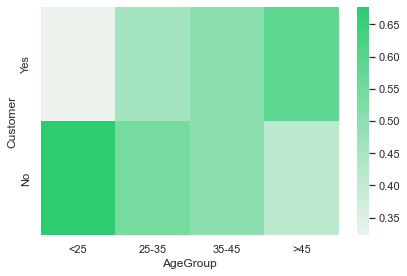

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
cmap = sns.light_palette("#2ecc71", as_cmap=True)
sns.heatmap(by_age, cmap=cmap)

#### By age

<AxesSubplot:xlabel='AgeGroup', ylabel='Frequency'>

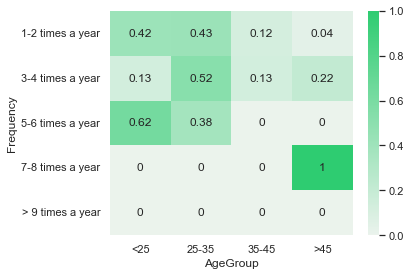

In [51]:
by_age = pd.crosstab(df['Frequency'], df['AgeGroup'], normalize='index', dropna=False)
sns.heatmap(by_age, cmap=cmap, annot=True)

#### By education

<AxesSubplot:xlabel='Education', ylabel='Frequency'>

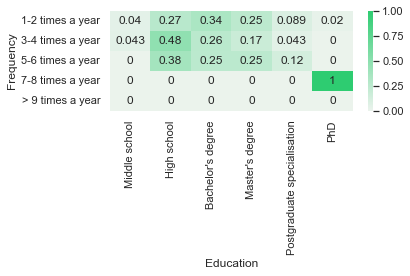

In [52]:
by_education = pd.crosstab(df['Frequency'], df['Education'], normalize='index', dropna=False)
sns.heatmap(by_education, cmap=cmap, annot=True)

#### By profession

<AxesSubplot:xlabel='Profession', ylabel='Frequency'>

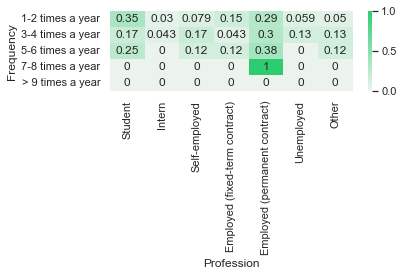

In [53]:
by_profession = pd.crosstab(df['Frequency'], df['Profession'], normalize='index', dropna=False)
sns.heatmap(by_profession, cmap=cmap, annot=True)

#### By purchase location

<AxesSubplot:xlabel='PurchaseLocation', ylabel='Frequency'>

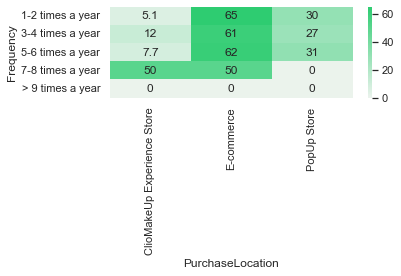

In [74]:
df_exploded = df.explode('PurchaseLocation')
by_recepient = pd.crosstab(df_exploded['Frequency'], df_exploded['PurchaseLocation'], normalize='index', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

#### By receipt amount

<AxesSubplot:xlabel='ReceiptAmountGroup', ylabel='Frequency'>

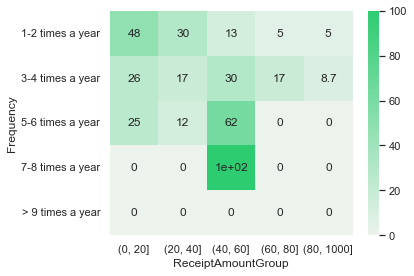

In [54]:
by_receipt = pd.crosstab(df['Frequency'], df['ReceiptAmountGroup'], normalize='index', dropna=False) *100
sns.heatmap(by_receipt, cmap=cmap, annot=True)

#### By recipient

<AxesSubplot:xlabel='SelfOrOthers', ylabel='Frequency'>

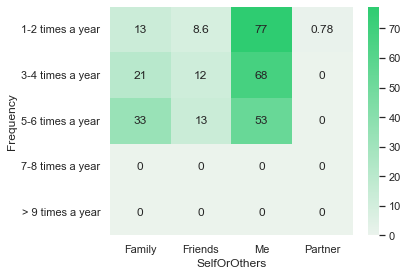

In [69]:
df_exploded = df.explode('SelfOrOthers')
by_recepient = pd.crosstab(df_exploded['Frequency'], df_exploded['SelfOrOthers'], normalize='index', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

### Brand known for

#### Total

<AxesSubplot:>

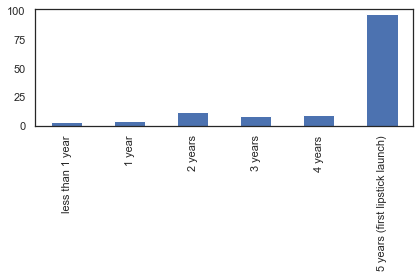

In [78]:
df['BrandKnownFor'].value_counts().sort_index().plot.bar()

#### By age

<AxesSubplot:xlabel='AgeGroup', ylabel='BrandKnownFor'>

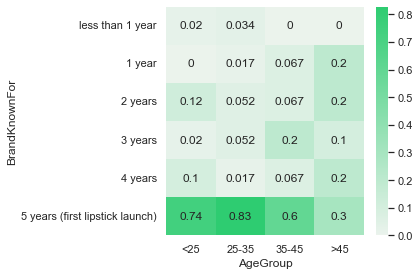

In [87]:
by_age = pd.crosstab(df['BrandKnownFor'], df['AgeGroup'], normalize='columns', dropna=False)
sns.heatmap(by_age, cmap=cmap, annot=True)

#### By purchase location

<AxesSubplot:xlabel='PurchaseLocation', ylabel='BrandKnownFor'>

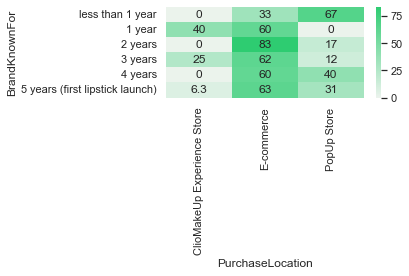

In [97]:
df_exploded = df.explode('PurchaseLocation')
by_recepient = pd.crosstab(df_exploded['BrandKnownFor'], df_exploded['PurchaseLocation'], normalize='index', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

#### By receipt amount

<AxesSubplot:xlabel='ReceiptAmountGroup', ylabel='BrandKnownFor'>

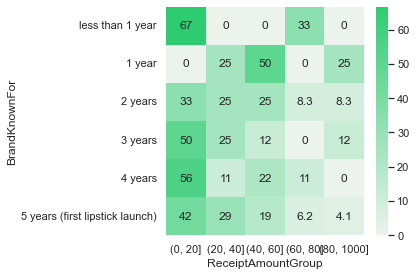

In [98]:
by_receipt = pd.crosstab(df['BrandKnownFor'], df['ReceiptAmountGroup'], normalize='index', dropna=False) *100
sns.heatmap(by_receipt, cmap=cmap, annot=True)

#### By recipient

<AxesSubplot:xlabel='SelfOrOthers', ylabel='BrandKnownFor'>

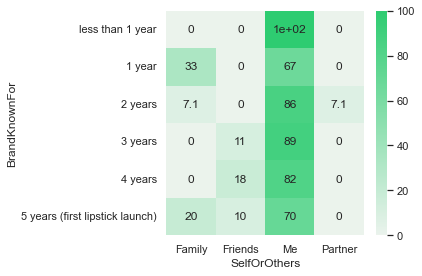

In [100]:
df_exploded = df.explode('SelfOrOthers')
by_recepient = pd.crosstab(df_exploded['BrandKnownFor'], df_exploded['SelfOrOthers'], normalize='index', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

### Receipt amount

#### Total

<AxesSubplot:>

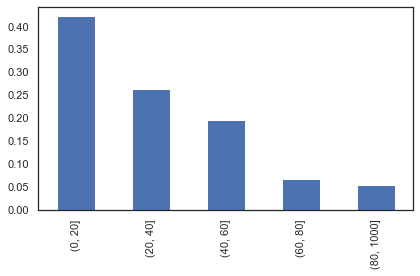

In [102]:
df['ReceiptAmountGroup'].value_counts(normalize=True).sort_index().plot.bar()

#### By age

<AxesSubplot:xlabel='AgeGroup', ylabel='ReceiptAmountGroup'>

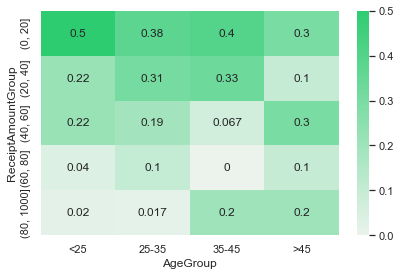

In [105]:
by_age = pd.crosstab(df['ReceiptAmountGroup'], df['AgeGroup'], normalize='columns', dropna=False)
sns.heatmap(by_age, cmap=cmap, annot=True)

#### By profession

<AxesSubplot:xlabel='Profession', ylabel='ReceiptAmountGroup'>

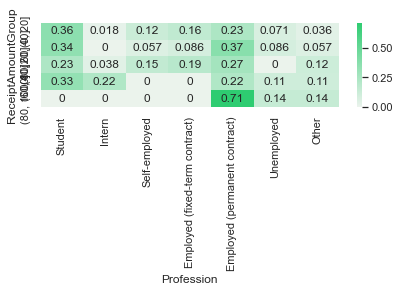

In [111]:
by_profession = pd.crosstab(df['ReceiptAmountGroup'], df['Profession'], normalize='index', dropna=False)
sns.heatmap(by_profession, cmap=cmap, annot=True)

#### By purchase location

<AxesSubplot:xlabel='PurchaseLocation', ylabel='ReceiptAmountGroup'>

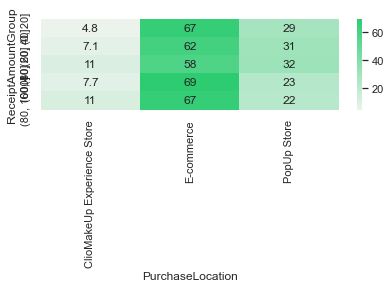

In [114]:
df_exploded = df.explode('PurchaseLocation')
by_recepient = pd.crosstab(df_exploded['ReceiptAmountGroup'], df_exploded['PurchaseLocation'], normalize='index', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

#### By recipient

<AxesSubplot:xlabel='SelfOrOthers', ylabel='ReceiptAmountGroup'>

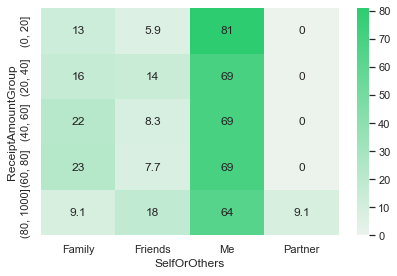

In [117]:
df_exploded = df.explode('SelfOrOthers')
by_recepient = pd.crosstab(df_exploded['ReceiptAmountGroup'], df_exploded['SelfOrOthers'], normalize='index', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

### Satisfaction

#### Total

<AxesSubplot:ylabel='Satisfaction'>

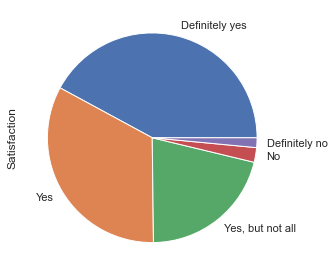

In [119]:
df['Satisfaction'].value_counts(normalize=True).sort_index().plot.pie()

#### By age

<AxesSubplot:xlabel='AgeGroup', ylabel='Satisfaction'>

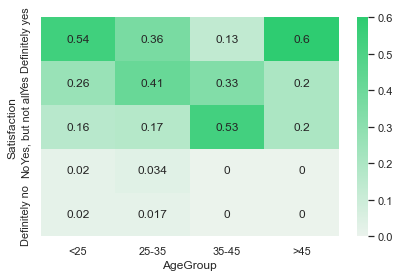

In [120]:
by_age = pd.crosstab(df['Satisfaction'], df['AgeGroup'], normalize='columns', dropna=False)
sns.heatmap(by_age, cmap=cmap, annot=True)

#### By profession

<AxesSubplot:xlabel='Profession', ylabel='Satisfaction'>

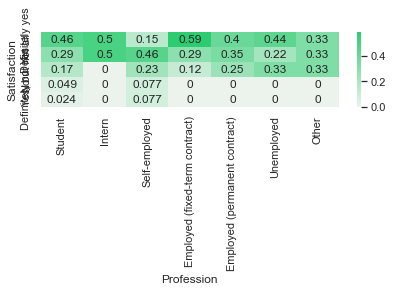

In [126]:
by_profession = pd.crosstab(df['Satisfaction'], df['Profession'], normalize='columns', dropna=False)
sns.heatmap(by_profession, cmap=cmap, annot=True)

#### By purchase location

<AxesSubplot:xlabel='PurchaseLocation', ylabel='Satisfaction'>

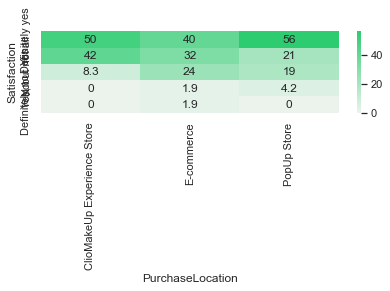

In [128]:
df_exploded = df.explode('PurchaseLocation')
by_recepient = pd.crosstab(df_exploded['Satisfaction'], df_exploded['PurchaseLocation'], normalize='columns', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

#### By receipt amount

<AxesSubplot:xlabel='ReceiptAmountGroup', ylabel='Satisfaction'>

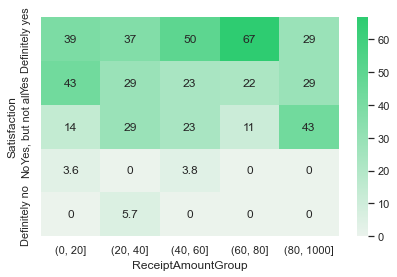

In [130]:
by_receipt = pd.crosstab(df['Satisfaction'], df['ReceiptAmountGroup'], normalize='columns', dropna=False) *100
sns.heatmap(by_receipt, cmap=cmap, annot=True)

#### By recipient

<AxesSubplot:xlabel='SelfOrOthers', ylabel='Satisfaction'>

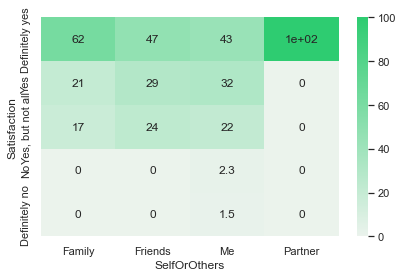

In [132]:
df_exploded = df.explode('SelfOrOthers')
by_recepient = pd.crosstab(df_exploded['Satisfaction'], df_exploded['SelfOrOthers'], normalize='columns', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

### Recipient

#### Total

#### By age

<AxesSubplot:xlabel='AgeGroup', ylabel='SelfOrOthers'>

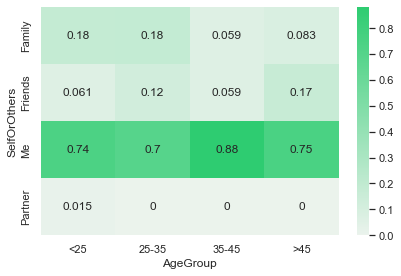

In [137]:
df_exploded = df.explode('SelfOrOthers')
by_age = pd.crosstab(df_exploded['SelfOrOthers'], df_exploded['AgeGroup'], normalize='columns', dropna=False)
sns.heatmap(by_age, cmap=cmap, annot=True)

#### By purchase location

<AxesSubplot:xlabel='PurchaseLocation', ylabel='SelfOrOthers'>

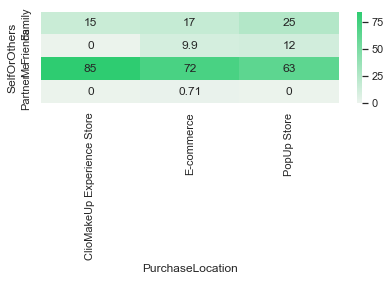

In [141]:
df_exploded = df.explode('SelfOrOthers')
df_exploded1 = df_exploded.explode('PurchaseLocation')
by_recepient = pd.crosstab(df_exploded1['SelfOrOthers'], df_exploded1['PurchaseLocation'], normalize='columns', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)